## **Topic :** **Diamond Price-Regression**

###  Attribute Info:
- **Carat Weight**: in grams
- **Cut**: how good the cut is
- **Color**: the color of the diamond
- **Clarity**: diamond clarity rating
- **Polish**: diamond polish rating
- **Symmetry**: diamond symmetry rating
- **Report**: which company has graded the diamond
- **Price**: in US dollars

In [71]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [72]:
df_raw=pd.read_csv('diamond.csv')
print('Before',df_raw.shape)
df_raw.drop_duplicates(inplace=True,ignore_index=True)
print('After',df_raw.shape)
df_raw.head(10)

Before (6000, 8)
After (5917, 8)


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
5,1.53,Ideal,E,SI1,ID,ID,AGSL,12791
6,1.00,Very Good,D,SI1,VG,G,GIA,5747
7,1.50,Fair,F,SI1,VG,VG,GIA,10450
8,2.11,Ideal,H,SI1,VG,VG,GIA,18609
9,1.05,Very Good,E,VS1,VG,G,GIA,7666


In [73]:
print(df_raw.isnull().sum())
print('<><><><><><><><><><><>')
print(df_raw.info())
print('<><><><><><><><><><><>')
print(df_raw.describe())

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64
<><><><><><><><><><><>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  5917 non-null   float64
 1   Cut           5917 non-null   object 
 2   Color         5917 non-null   object 
 3   Clarity       5917 non-null   object 
 4   Polish        5917 non-null   object 
 5   Symmetry      5917 non-null   object 
 6   Report        5917 non-null   object 
 7   Price         5917 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 369.9+ KB
None
<><><><><><><><><><><>
       Carat Weight          Price
count   5917.000000    5917.000000
mean       1.335658   11816.143147
std        0.476646   10206.056814
min        0.750000    2184.000000
25%        1.0000

In [74]:
print(df_raw.Cut.unique())
print(df_raw.Cut.value_counts())
print('-------------------------')
print(df_raw.Color.unique())
print(df_raw.Color.value_counts())
print('-------------------------')
print(df_raw.Clarity.unique())
print(df_raw.Clarity.value_counts())
print('-------------------------')
print(df_raw.Polish.unique())
print(df_raw.Polish.value_counts())
print('-------------------------')
print(df_raw.Symmetry.unique())
print(df_raw.Symmetry.value_counts())
print('-------------------------')
print(df_raw.Report.unique())
print(df_raw.Report.value_counts())

['Ideal' 'Very Good' 'Fair' 'Good' 'Signature-Ideal']
Ideal              2445
Very Good          2402
Good                702
Signature-Ideal     240
Fair                128
Name: Cut, dtype: int64
-------------------------
['H' 'E' 'G' 'D' 'F' 'I']
G    1472
H    1064
F    1002
I     952
E     773
D     654
Name: Color, dtype: int64
-------------------------
['SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'IF' 'FL']
SI1     2022
VS2     1559
VS1     1172
VVS2     659
VVS1     282
IF       219
FL         4
Name: Clarity, dtype: int64
-------------------------
['VG' 'ID' 'EX' 'G']
EX    2396
VG    2379
ID     573
G      569
Name: Polish, dtype: int64
-------------------------
['EX' 'ID' 'VG' 'G']
VG    2391
EX    2033
G      907
ID     586
Name: Symmetry, dtype: int64
-------------------------
['GIA' 'AGSL']
GIA     5205
AGSL     712
Name: Report, dtype: int64


In [75]:
df_raw.Cut=df_raw.Cut.map({'Ideal':0 ,'Very Good':1 , 'Good':2 , 'Signature-Ideal':3 ,'Fair':4})
df_raw.Color=df_raw.Color.map({'G':0,'H':1,'F':2,'I':3,'E':4,'D':5})
df_raw.Clarity=df_raw.Clarity.map({'SI1':0, 'VS1':1, 'VS2' :2,'VVS2':3, 'VVS1' :4,'IF':5, 'FL':6})
df_raw.Polish=df_raw.Polish.map({'VG':0, 'ID':1, 'EX':2, 'G':3})
df_raw.Symmetry=df_raw.Symmetry.map({'EX':0, 'ID':1, 'VG':2 ,'G':3})
df_raw.Report=df_raw.Report.map({'GIA':0 ,'AGSL':1})

In [76]:
df_raw.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,0,1,0,0,0,0,5169
1,0.83,0,1,1,1,1,1,3470
2,0.85,0,1,0,2,0,0,3183
3,0.91,0,4,0,0,2,0,4370
4,0.83,0,0,0,2,0,0,3171


<AxesSubplot:>

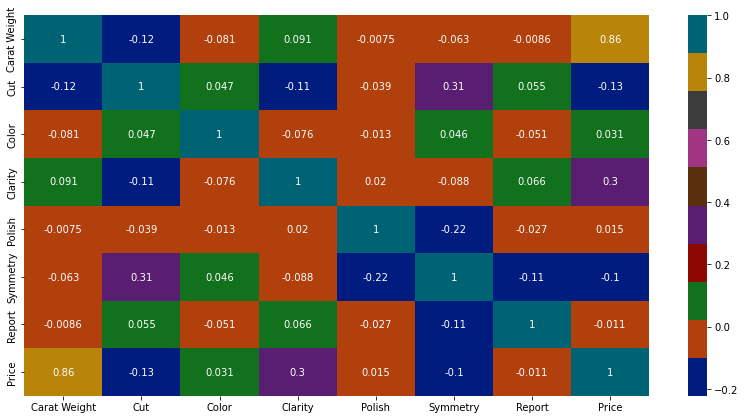

In [79]:
plt.figure(figsize=(14,7))
cmap=sns.color_palette('dark',as_cmap=True)
sns.heatmap(df_raw.corr(),annot=True,cmap=cmap)

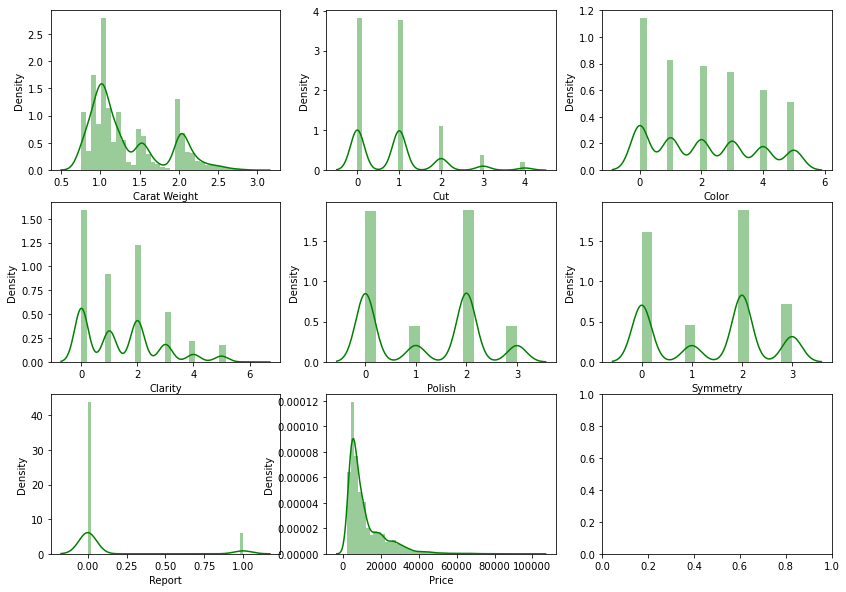

In [102]:
fig,ax=plt.subplots(3,3,figsize=(14,10))
for i,subplots in zip(df_raw.columns,ax.flatten()):
    sns.distplot(df_raw[i],ax=subplots,color='green')

<AxesSubplot:xlabel='Polish', ylabel='Price'>

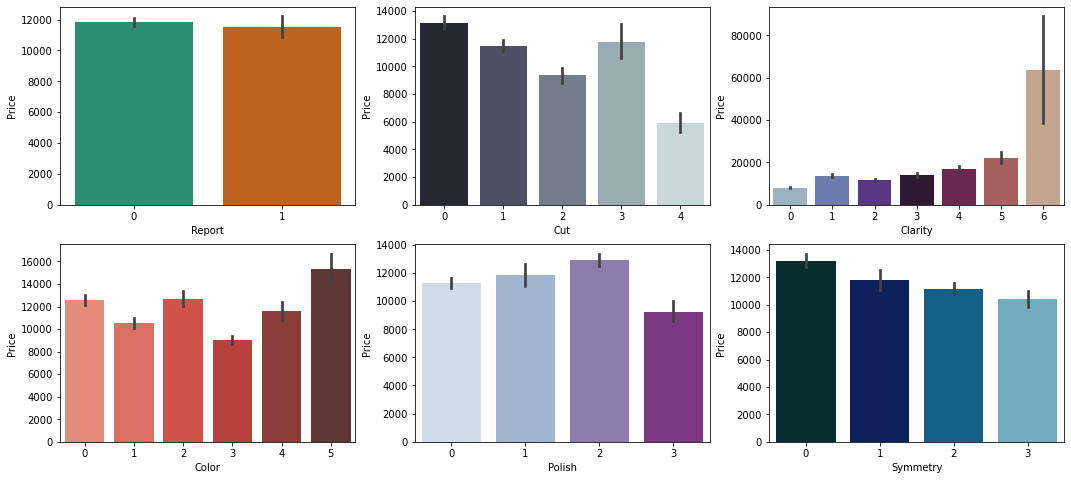

In [146]:
fig,ax=plt.subplots(2,3,figsize=(18,8))
# 'GIA':0 ,'AGSL':1
sns.barplot(x=df_raw.Report,y=df_raw.Price,ax=ax[0,0],palette='Dark2')
# {'Ideal':0 ,'Very Good':1 , 'Good':2 , 'Signature-Ideal':3 ,'Fair':4}
sns.barplot(x=df_raw.Cut,y=df_raw.Price,ax=ax[0,1],palette='bone')
# {'SI1':0, 'VS1':1, 'VS2' :2,'VVS2':3, 'VVS1' :4,'IF':5, 'FL':6}
sns.barplot(x=df_raw.Clarity,y=df_raw.Price,ax=ax[0,2],palette='twilight')
#sns.scatterplot(x=df_raw['Carat Weight'],y=df_raw.Price,ax=ax[1,1],color='brown')
# {'G':0,'H':1,'F':2,'I':3,'E':4,'D':5}
sns.barplot(x=df_raw.Color,y=df_raw.Price,ax=ax[1,0],palette='Reds_d')
# {'EX':0, 'ID':1, 'VG':2 ,'G':3}
sns.barplot(x=df_raw.Symmetry,y=df_raw.Price,ax=ax[1,2],palette='ocean')
# {'VG':0, 'ID':1, 'EX':2, 'G':3}
sns.barplot(x=df_raw.Polish,y=df_raw.Price,ax=ax[1,1],palette='BuPu')

- **Splitting**

In [157]:
#spliting data
from sklearn.model_selection import train_test_split
x=df_raw.drop('Price',1)
y=df_raw.Price
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

- **LinearRegression Model**

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
lr=LinearRegression()
ypred=lr.fit(xtrain,ytrain).predict(xtest)
print('R2-Score:',r2_score(ytest,ypred))
print('MAE:',mean_absolute_error(ytest,ypred))
print('MSE:',mean_squared_error(ytest,ypred))
print('RMSE:',np.sqrt(mean_squared_error(ytest,ypred)))
print('MAPE:',mean_absolute_percentage_error(ytest,ypred))

R2-Score: 0.7972624429491137
MAE: 2805.791489091268
MSE: 20523080.424049538
RMSE: 4530.240658513578
MAPE: 0.29156258681879826


- **DecisionTreeRegressor Model**

In [173]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
ypred=dt.fit(xtrain,ytrain).predict(xtest)
print('R2-Score:',r2_score(ytest,ypred))
print('MAE:',mean_absolute_error(ytest,ypred))
print('MSE:',mean_squared_error(ytest,ypred))
print('RMSE:',np.sqrt(mean_squared_error(ytest,ypred)))
print('MAPE:',mean_absolute_percentage_error(ytest,ypred))

R2-Score: 0.9697623790598332
MAE: 924.2908783783785
MSE: 3060948.032589777
RMSE: 1749.5565245483717
MAPE: 0.07547933461506891


### Conclusion:
- The DecisionTreeRegressor Model is giving better scores
- R2-score is 0.96 it increase compared to LinearRegression Model
- Errors are also minimized 